<a href="https://colab.research.google.com/github/Ansuman09/TemperatureAnalysis/blob/main/ComparinngTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEMPERATURE DIFFERENCE 2021  IN 
###CENTRAL PARK,NY
##USING GHCN-D DATA 

In [ ]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

weather_data=pd.read_csv('USW00094728.csv')
weather_data.columns=['ID','DATE','ELEMENT','VALUE1','MFLAG1','LATITUDE','SFLAG1','LONGITUDE']
weather_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,DATE,ELEMENT,VALUE1,MFLAG1,LATITUDE,SFLAG1,LONGITUDE
0,USW00094728,18690102,TMAX,-28,NaN,NaN,Z,NaN
1,USW00094728,18690103,TMAX,17,NaN,NaN,Z,NaN
2,USW00094728,18690104,TMAX,28,NaN,NaN,Z,NaN
3,USW00094728,18690105,TMAX,61,NaN,NaN,Z,NaN
4,USW00094728,18690106,TMAX,33,NaN,NaN,Z,NaN


In [ ]:
weather_data['VALUE1']=weather_data['VALUE1']/10
weather_data=weather_data[(weather_data['DATE']>=20050000) & (weather_data['DATE']<20220000)]

weather_data['DATE']=weather_data['DATE'].astype(str)
def date_converter(item):
  year=re.findall('.{4}',item)
  month=re.findall('.{2}',year[1])
  return year[0]+'-'+month[0]+'-'+month[1]

weather_data['DATE']=weather_data['DATE'].apply(date_converter)
weather_data.set_index(weather_data['DATE'],inplace=True)
weather_data.sort_index(inplace=True)

weather_data['DAY']=weather_data['DATE'].str.extract('(?:\-)(.+)')
weather_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,DATE,ELEMENT,VALUE1,MFLAG1,LATITUDE,SFLAG1,LONGITUDE,DAY
DATE,,,,,,,,,
2005-01-01,USW00094728,2005-01-01,TMAX,15.6,NaN,NaN,0,2400.0,01-01
2005-01-01,USW00094728,2005-01-01,SNWD,0.0,NaN,NaN,0,NaN,01-01
2005-01-01,USW00094728,2005-01-01,PRCP,0.0,NaN,NaN,0,2400.0,01-01
2005-01-01,USW00094728,2005-01-01,AWND,3.8,NaN,NaN,X,NaN,01-01
2005-01-01,USW00094728,2005-01-01,FMTM,222.7,NaN,NaN,X,NaN,01-01


In [ ]:

survey_data=weather_data[weather_data.DATE<='2020']
max_temp=survey_data[survey_data['ELEMENT']=='TMAX']
min_temp=survey_data[survey_data['ELEMENT']=='TMIN']

max_temp.set_index('DAY',inplace=True)
max_temp=max_temp.groupby('DAY').agg({'VALUE1':np.max})
max_temp.columns=['TMAX']

min_temp.set_index('DAY',inplace=True)
min_temp=min_temp.groupby('DAY').agg({'VALUE1':np.min})
min_temp.columns=['TMIN']

temp_data=pd.merge(max_temp,min_temp,how='outer',left_index=True,right_index=True)
temp_data.head()

,TMAX,TMIN
DAY,,
01-01,15.6,-13.8
01-02,11.1,-10.5
01-03,14.4,-12.7
01-04,13.3,-13.2
01-05,16.7,-12.7


In [ ]:

#code for leaving out leapdays
temp_data.drop('02-29',inplace=True)

#code for year 2015 using pivot table
weather_data.DATE=pd.to_datetime(weather_data.DATE)
df=weather_data[((weather_data['ELEMENT']=='TMAX') | (weather_data['ELEMENT']=='TMIN')) & (weather_data.DATE>='2021')]
df=df.set_index('ELEMENT')
df.sort_index(inplace=True)
df2021=pd.pivot_table(df,values=['VALUE1'],index=['DAY'],columns=['ELEMENT'])
df2021.columns=['TMAX','TMIN']

temp_data.reset_index(inplace=True)
df2021.reset_index(inplace=True)
temp_data.head()

,DAY,TMAX,TMIN
0,01-01,15.6,-13.8
1,01-02,11.1,-10.5
2,01-03,14.4,-12.7
3,01-04,13.3,-13.2
4,01-05,16.7,-12.7


In [ ]:
# days on which the max temp crossed historical_data
max_data=df2021[df2021['TMAX']>=temp_data['TMAX']]

max_data.head()

,DAY,TMAX,TMIN
69,03-11,21.7,6.7
84,03-26,27.8,11.1
141,05-22,31.7,18.3
142,05-23,31.1,20.0
155,06-05,31.7,18.9


In [ ]:
#days on which the max temp was lower than historical_data
min_data=df2021[df2021['TMIN']<=temp_data['TMIN']]
min_data.head()

,DAY,TMAX,TMIN
28,01-29,-3.8,-9.9
91,04-02,3.9,-2.1
92,04-03,11.7,0.0
111,04-22,8.9,2.2
112,04-23,17.8,3.9


## PLOTTING

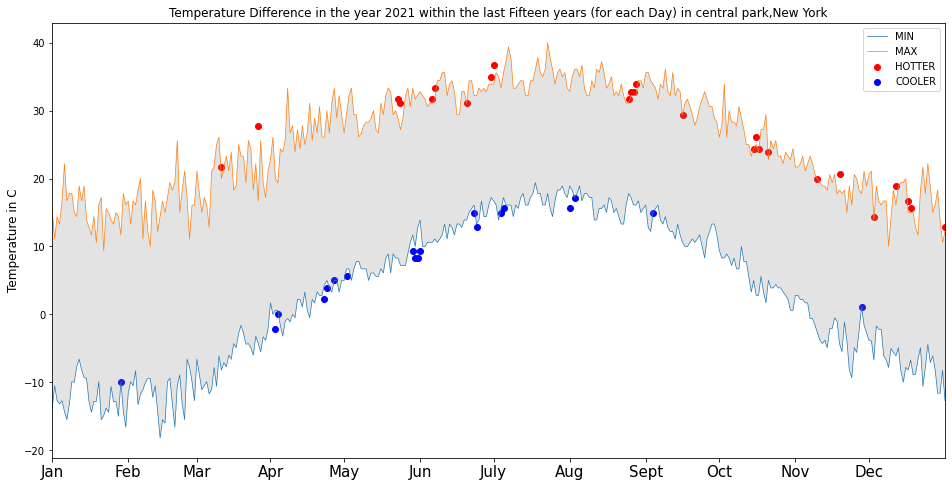

In [ ]:
#to change xticks into strings pass the ticks list then string list
months=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']
tick_month=[0,31,59,89,119,150,180,211,242,272,303,333]

plt.figure(figsize=(16,8))
plt.plot(temp_data['TMIN'],'-',temp_data['TMAX'],'-',linewidth=0.7)
plt.scatter(max_data.index,max_data['TMAX'],c='red')
plt.scatter(min_data.index,min_data['TMIN'],c='blue')
plt.xticks(tick_month,months)
plt.gca().fill_between(temp_data.index,temp_data['TMIN'],temp_data['TMAX'],facecolor='grey',alpha=.22)
plt.title('Temperature Difference in the year 2021 within the last Fifteen years (for each Day) in central park,New York')

plt.ylabel('Temperature in C',fontsize='large')
plt.legend(['MIN','MAX','HOTTER','COOLER'])

for item in plt.gca().xaxis.get_ticklabels():
  item.set_fontsize(15)

plt.margins(x=0)
